In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib import histos2d as h2
%matplotlib inline

In [2]:
t, mu_s, sigma_s, mu = 0.03, 60, 6, .2
m = h2.MLE_BinarizedSignalBg(n_events=1000, params=[t, mu_s, sigma_s, mu])

### sample the continuous experiment and then bin

In [5]:
hc = m.hrvs_c(10000)
hc.shape

(10000, 20)

### sample directly the bin counts from the analytical Poisson

In [6]:
hb = m.hrvs_b(10000)
hb.shape

(10000, 20)

### samples are similar but, binned data has a higher variance (see [Sheppard's Correction](https://en.wikipedia.org/wiki/Sheppard%27s_correction))

Text(0, 0.5, 'bin std')

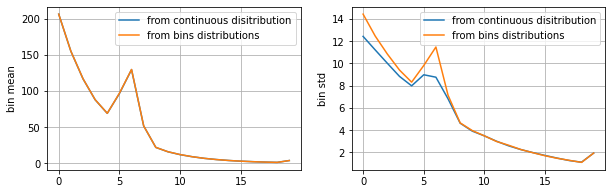

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(hc.mean(axis=0), label="from continuous disitribution")
plt.plot(hb.mean(axis=0), label="from bins distributions")
plt.grid();
plt.legend()
plt.ylabel("bin mean")

plt.subplot(122)
plt.plot(hc.std(axis=0), label="from continuous disitribution")
plt.plot(hb.std(axis=0), label="from bins distributions")
plt.grid();
plt.legend()
plt.ylabel("bin std")

### empirical and analytical distribution on each bin

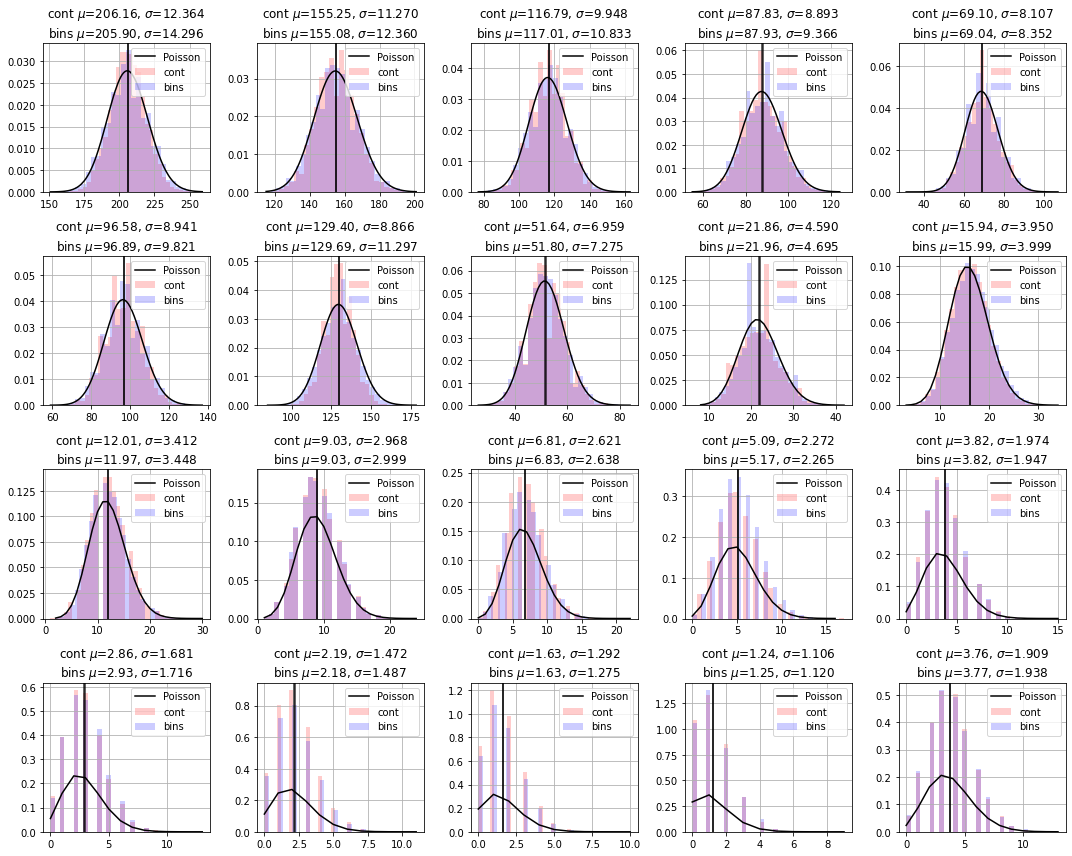

In [8]:
m.plot_bins_histograms(10000)